# <center>Digital Image Processing - <br>Intensity Transformations and Spatial Filtering<center>
    
## <center>Problem Set 2</center>

### Student Names: Jorge Aguilar, Jorge Díaz, Jorge Lambraño

### Instructions

This Problem Set covers the topics of Image enhancement in the spatial domain, power law transformations, histogram equalization, smoothing, median filters, image sharpening, Laplacian of an image, image gradients and Sobel operators. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

## Problem 1

Implement the code for the function below, which runs histogram equalization on a grayscale image. Your code should compute the histogram of the image, and use the cdf as a transformation function. The function should return the equalized image as an array. Use the function to do histogram equalization on the images <tt>darkPollen.jpg</tt>, <tt>lightPollen.jpg</tt>, <tt>lowContrastPollen.jpg</tt>, <tt>pollen.jpg</tt>, <tt>spine.jpg</tt> and <tt>runway.jpg</tt>. Include in the report plots and comparisons between the histograms of the corrected images to those of the originals. Also include a plot of the transformation function that equalizes the input histograms. Please comment your results.

In [8]:
from os import listdir, path
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

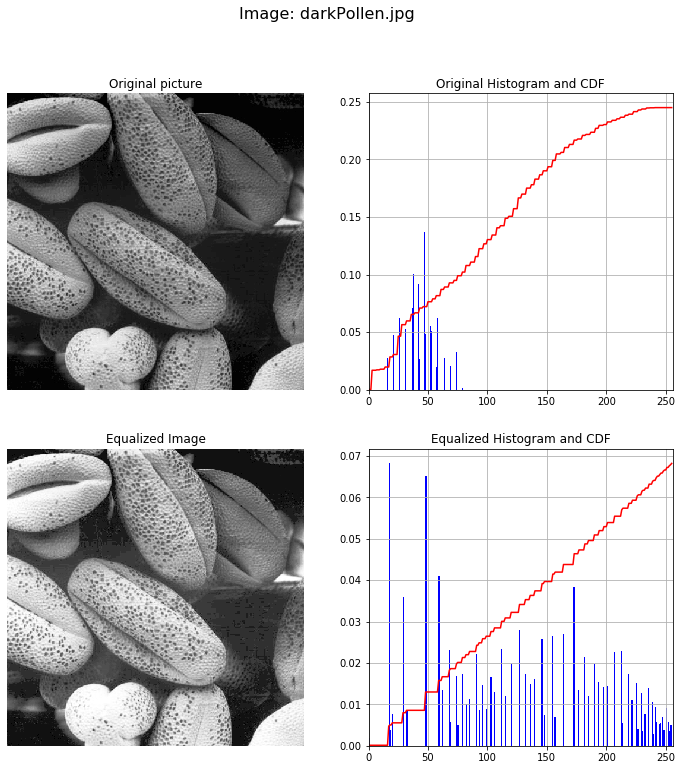

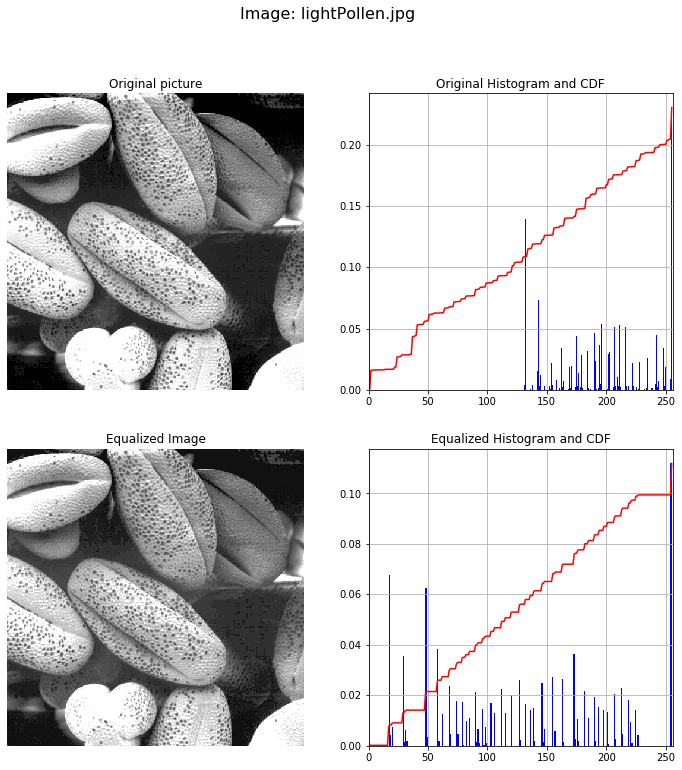

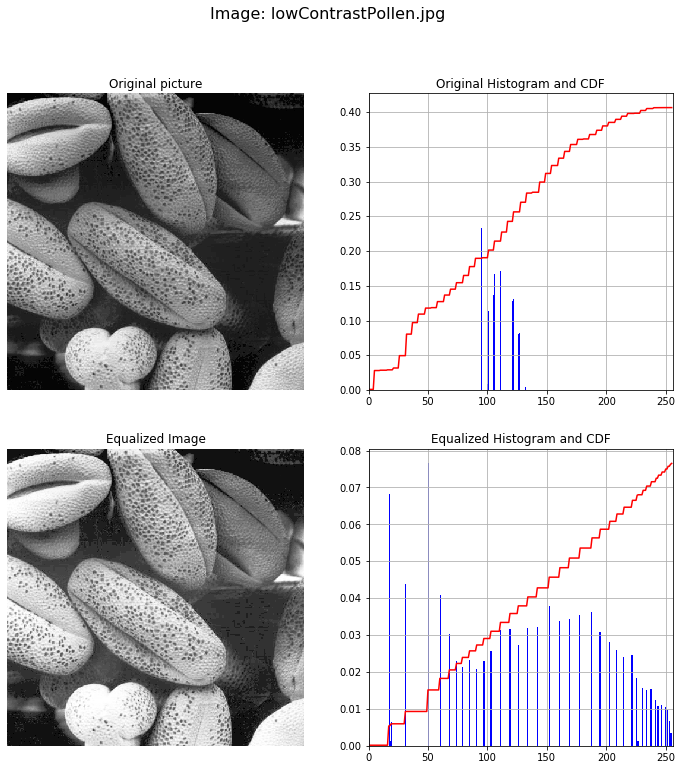

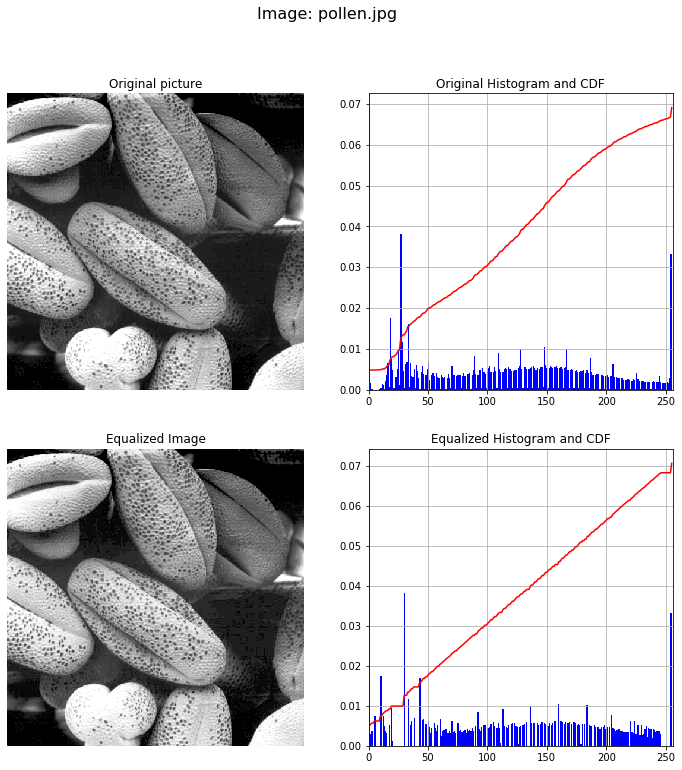

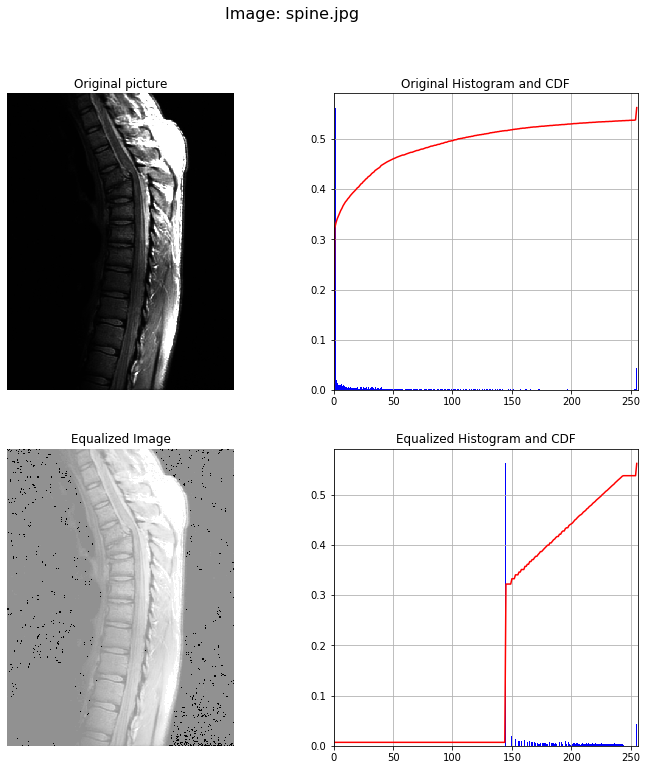

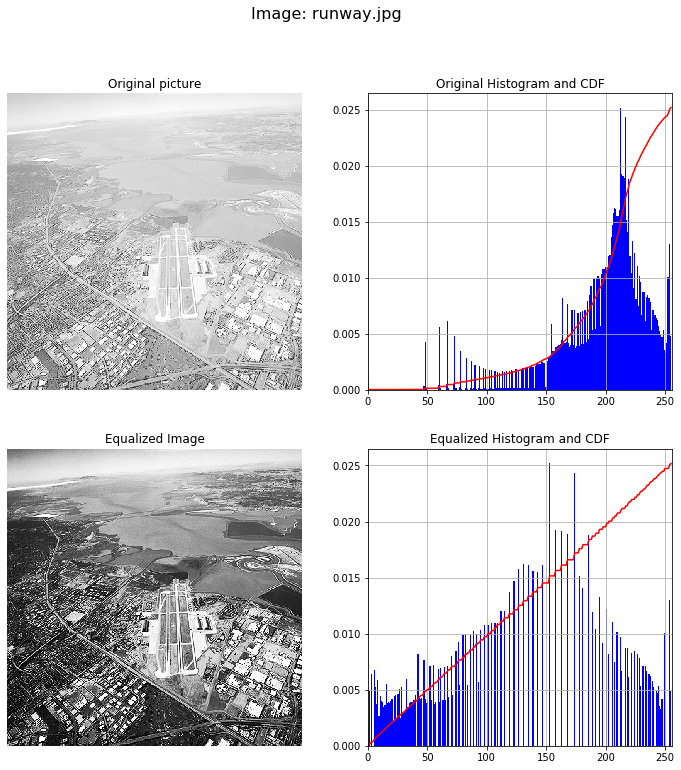

In [7]:
#-------------------------------------------------------------------------------
def processImage(matrix_image, name):
    # define figure
    plt.figure(figsize = (12,12))
    # display original picture
    plt.subplot(2,2,1)
    plt.imshow(matrix_image, cmap = 'gray')
    plt.title("Original picture")
    plt.axis('off')
    # display orignal histogram and cdf
    plt.subplot(2,2,2)
    histogram(matrix_image)
    plt.title("Original Histogram and CDF")
    # display equzalized image
    plt.subplot(2,2,3)
    equ_img = cv2.equalizeHist(matrix_image)
    plt.imshow(equ_img, cmap = 'gray')
    plt.title('Equalized Image')
    plt.axis('off')
    # display equalized histogram
    plt.subplot(2,2,4)
    histogram(equ_img)
    plt.title('Equalized Histogram and CDF')
    plt.suptitle('Image: ' + name , fontsize=16)
#-------------------------------------------------------------------------------
def histogram(image):
    [hist_image, bins] = np.histogram(image.ravel(), 256, density=True);
    original_cdf = hist_image.cumsum()
    #normalize cdf
    h_max = hist_image.max()
    normalized_cdf = original_cdf * h_max/ original_cdf.max()
    #plot histogram and cdf
    plt.plot(normalized_cdf, color='r')
    plt.hist(image.ravel(), 256, color='b', density=True) 
    plt.xlim([0,256])
    plt.grid(True)
#------------------------------------------------------------------------------
def equalize_image(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image
#-------------------------------------------------------------------------------
def main1():
    image_names = ['darkPollen.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 
                   'pollen.jpg', 'spine.jpg', 'runway.jpg']
    for name in (image_names):
        image = cv2.imread("files/" + name, 0)
        processImage(image, name)
    plt.show()

#-------------------------------------------------------------------------------
main1()

### Result:

The histogram equalization show significant improvement on darkPollen, lightPollen, 
lowConstrastPollen and runway image. The equalized images have a better constrast 
and this can be observed when histrograms are compared, equalized image histogram usually 
has a high gray level band and gray components are more separated from each other. 

However, images like spine image, which have a large concentration of pixel on a 
white or black value, the contrast improvement are not significative. The efect of 
histrogram equalization is move the concentration of pixels to histogram center. So, 
color image is "gray". 

## Problem 2

Implement the code for the function below which performs a power law transformation on an image. This function should take an image array and the gamma value to be used in the transformation as its only input parameters. The function should return a new image array which is the power transformation of the original image. Power law transformations are achieved using the following formula:
$$ g(x,y) = T[f(x,y)] = c \cdot f(x,y) ^ \gamma $$

where $g(x,y)$ is the output pixel value, $f(x,y)$ is the original pixel value, $\gamma$ is the parameter controlling the power law transformation and $c$ is a constant usually set to 1. Note that you convert the image so that the intensity values are in the range 0.0 – 1.0, rather than in 0 – 255.

Try this new function out on the images <tt>spine.jpg</tt> and <tt>runway.jpg</tt>, experimenting with different values for $\gamma$. Please comment your results.

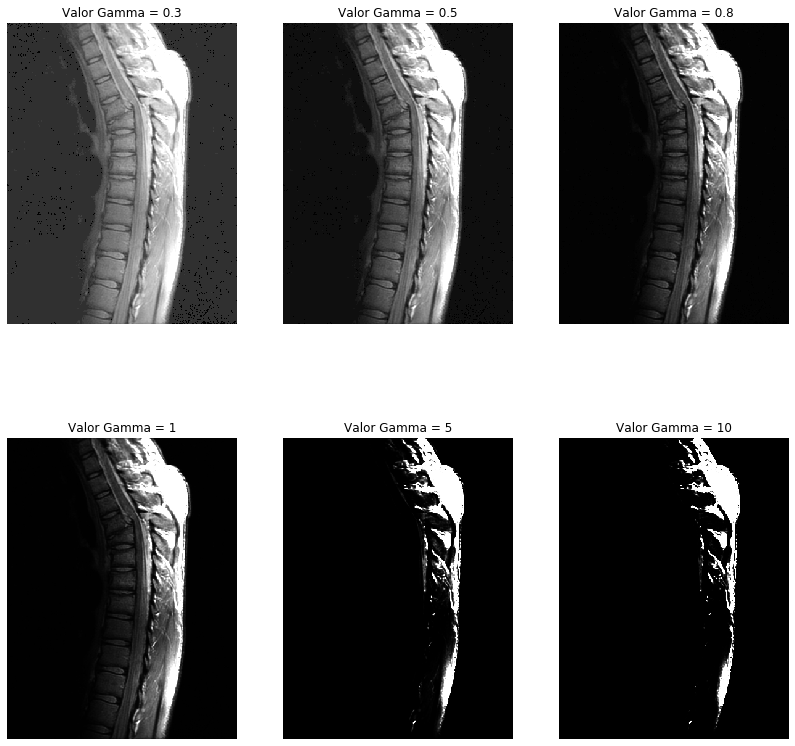

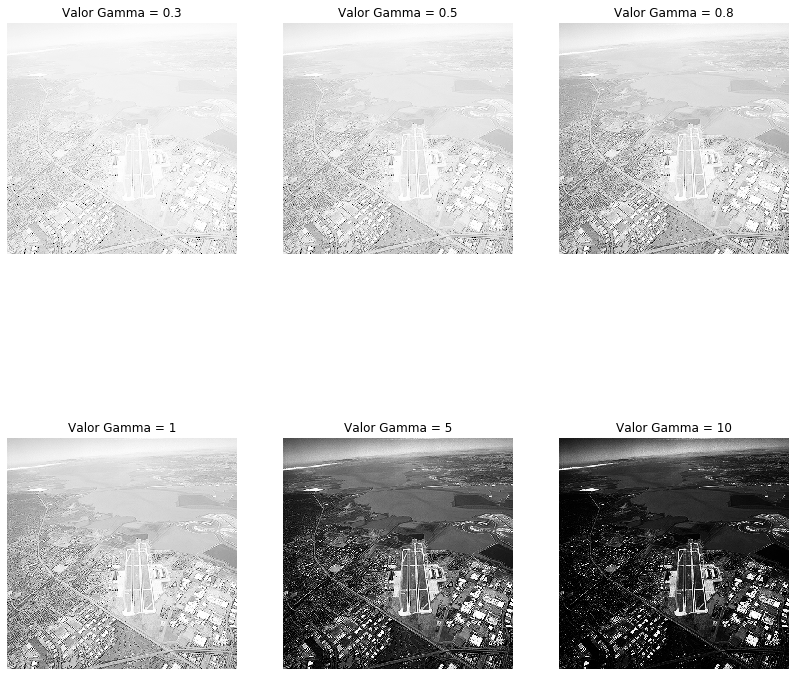

In [6]:
#------------------------------------------------------------------------------
def T_fxy(imagen, gamma):
    imagen_out = 1 * np.power(imagen/255.0,gamma)
    return (imagen_out*255).astype('int')
#------------------------------------------------------------------------------
def processImage2(image):
    valores_gamma = [0.3, 0.5, 0.8, 1, 5, 10] 
    position = 1; 
    plt.figure(figsize = (14, 14))
    for y in valores_gamma:
        plt.subplot(2, 3, position)
        position = position + 1
        plt.imshow(T_fxy(image,y), cmap='gray')
        plt.title("Valor Gamma = " + str(y))
        plt.axis('off')
#------------------------------------------------------------------------------
def main2():
    imagenes = ["spine.jpg", "runway.jpg"]
    for nombre_imagen in imagenes:
        imagen = cv2.imread("files/"+nombre_imagen, cv2.IMREAD_GRAYSCALE)
        processImage2(imagen)
    plt.show()
#------------------------------------------------------------------------------
main2()

### Result:

The gamma transformation can be explained using the following equation: 

$
\begin{equation}
    s = r^{\gamma}
    \label{gamma}
\end{equation}
$

The gamma correction, for $\gamma < 1$, map a narrow range of dark input values into a
wider range of output values, as a result, the contrast increase between dark colors 
so, image make lighter. In contrast, when $\gamma > 1$, the effect is opossite, the 
contrast between light tones increase. 

Finally, $\gamma = 1$, the equation reduces to the identity transformation. So, the output
is the orginal image. 

Choose a nice gamma value is important to show an improvement: A gamma value ($\gamma > 6$) 
so high can generate a predominantly dark image, and a low gamma value ($\gamma < 0.2$) generate
a too much light image. 

## Problem 3

Implement a function that performs smoothing on an input image with an averaging filter mask of size $n$. The function should take two inputs: an image matrix and the filter size $n$. Use the image <tt>test_pattern_blurring_orig.tif</tt> to test your algorithm. Use averaging filter masks of sizes $n = 3, 5, 9, 15, 35$. Analyze the results you obtained.

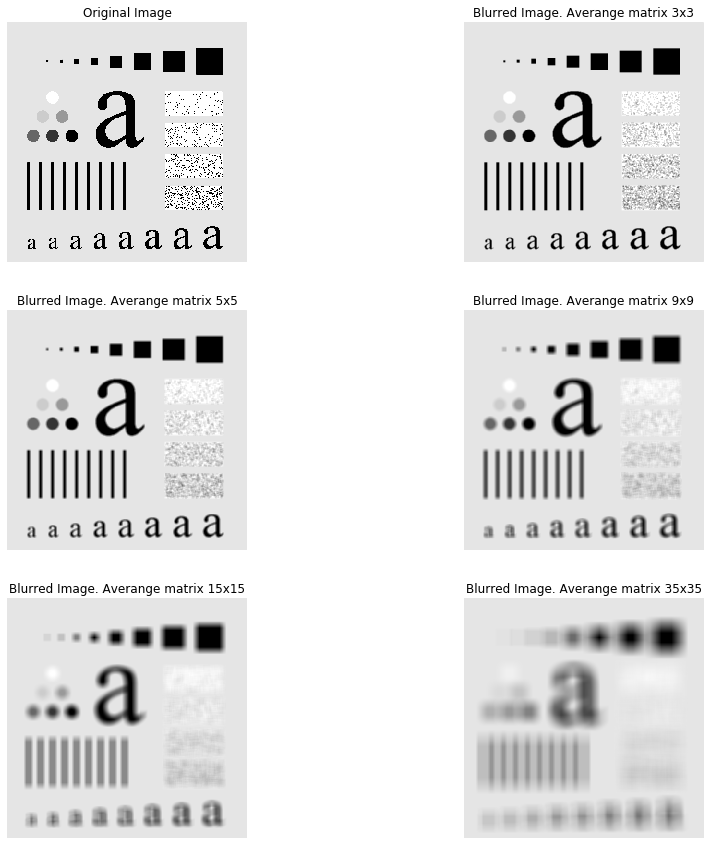

In [9]:
#------------------------------------------------------------------------------
def blurre_image(image, sigma):
    return cv2.blur(image,(sigma, sigma))
#------------------------------------------------------------------------------
def gaussian_filter(image, sigma):
    return ndimage.gaussian_filter(image, sigma = sigma)
#------------------------------------------------------------------------------    
def main3():
    # Load image using RGB format
    imagen = cv2.imread('files/test_pattern_blurring_orig.png',cv2.IMREAD_COLOR) 
    sigma_list = [3, 5, 9, 15, 35]
    # display original image
    plt.figure(figsize = (15,15))
    plt.subplot(3, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')
    pos = 2     
    for sigma in sigma_list:
        plt.subplot(3, 2, pos)
        pos = pos + 1
        blurred_image = blurre_image(imagen, sigma)
        plt.imshow(blurred_image, cmap='gray')
        plt.axis('off')
        plt.title('Blurred Image. Averange matrix ' + str(sigma) + 'x'+ str(sigma))
    plt.show()
#----------------------------------------------------------------------------
main3()

### Result: 

The average filter is used to reduce noise and to blur images, this filter is a kind
of $\textit{low pass filter}$, because it attenuates borders. The low pass filter effect 
reduce details on the image and it can delete some small elements. he smoothing effect depends on 
the size of kernel, if the size of kernel increases, the smoothing increases also. 
For example, a 3x3 kernel show very small changes in constrast to 15x15 or 35x35 kernel.

## Problem 4

Consider the image <tt>ckt_board_saltpep_prob_pt05.png</tt>. It has been corrupted with ‘salt-and-pepper’ noise (more formally known as impulse noise). Try to remove the noise from this image by applying a median filter of size 3x3. Compare the result to applying an averaging filter of size 3x3.  Increase the kernel size to 3x3, 5x5, 9x9, 15x15 and repeat. Analyze the results you obtained. Did the filter successfully remove the noise? Did you observe any other side effects?

You can also corrupt any image you like with a salt-and-pepper noise generator. Write another function which adds salt-and-pepper noise to an input image. Use that function to corrupt additional images. Try to recover the original images using a median filter of appropriate size.

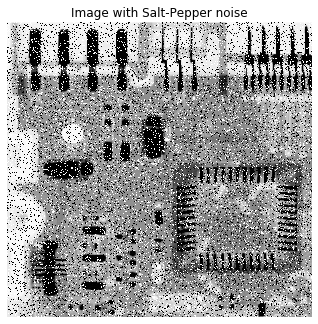

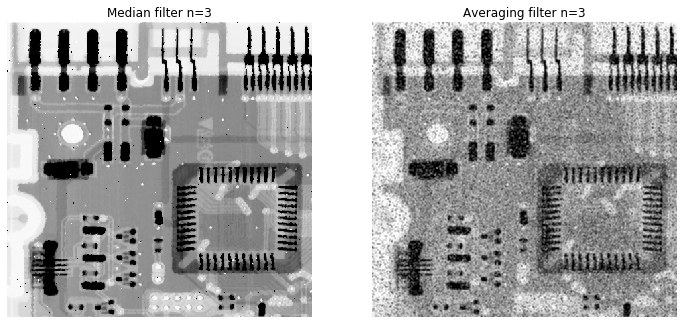

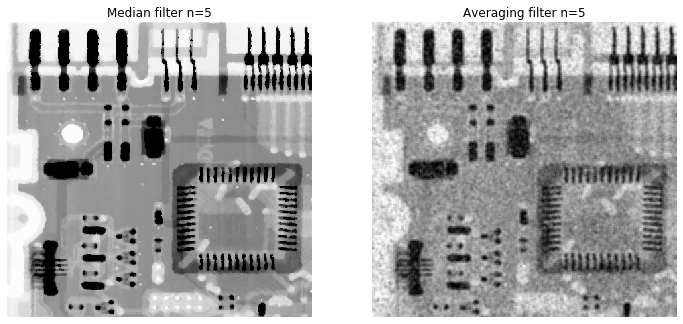

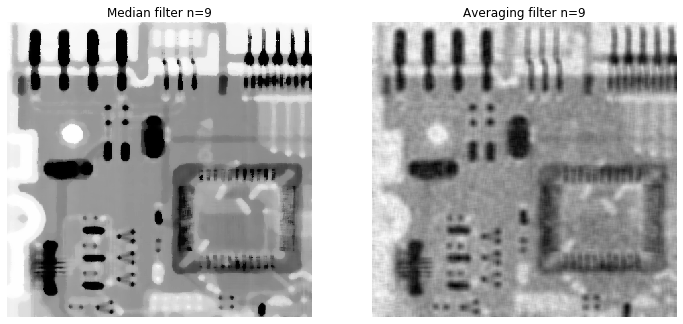

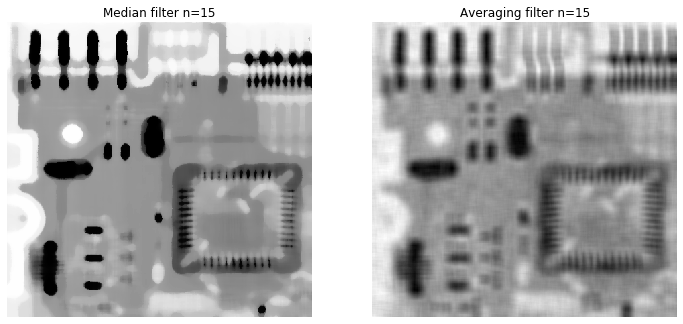

In [15]:
#------------------------------------------------------------------------------
def median_filter(image,n):
    return cv2.medianBlur(image,n)
#------------------------------------------------------------------------------
def averaging_filter(image,n):
    return cv2.blur(image,(n,n))
#------------------------------------------------------------------------------
def main4():
    imagen = cv2.imread("files/ckt_board_saltpep_prob_pt05.png", cv2.IMREAD_GRAYSCALE)
    # Display original image
    plt.figure(figsize = (12,12))
    plt.subplot(1,2,1)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.title('Image with Salt-Pepper noise')
    kernel_size = [3, 5, 9, 15]
    for n in kernel_size:
        # Display median filter output 
        plt.figure(figsize = (12,12))
        plt.subplot(1,2,1)
        plt.imshow(median_filter(imagen,n), cmap='gray')
        plt.title('Median filter n='+str(n))
        plt.axis('off')
        # Display averaging filter output
        plt.subplot(1,2,2)
        plt.imshow(averaging_filter(imagen,n), cmap='gray')
        plt.title('Averaging filter n='+str(n))
        plt.axis('off')
    plt.show()
#-------------------------------------------------------------------------------
main4()

/home/jelambrar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/home/jelambrar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


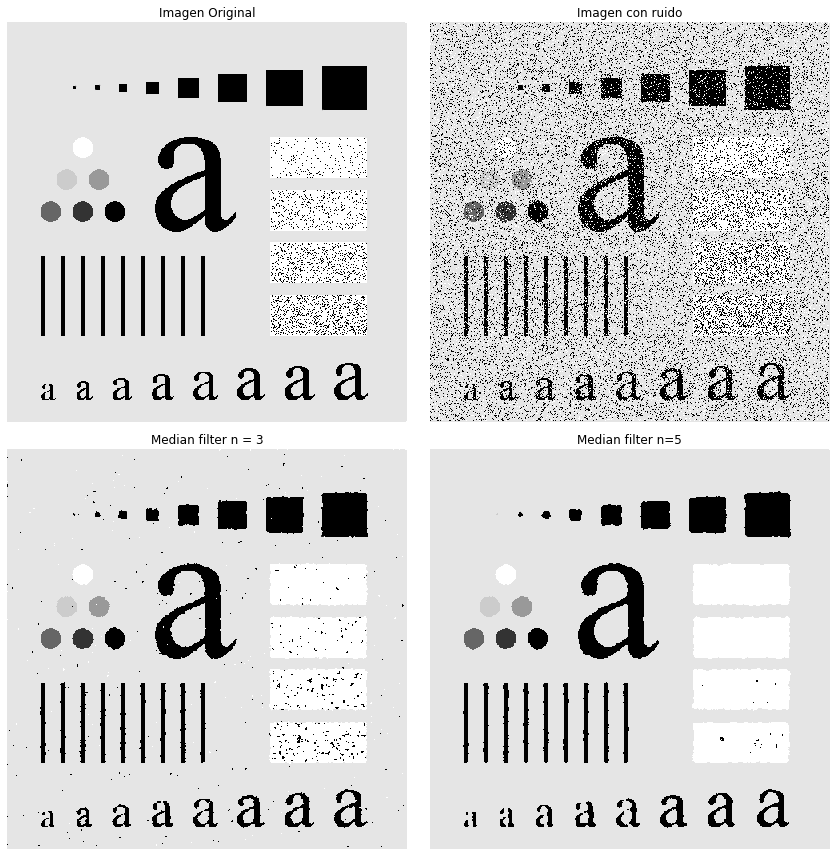

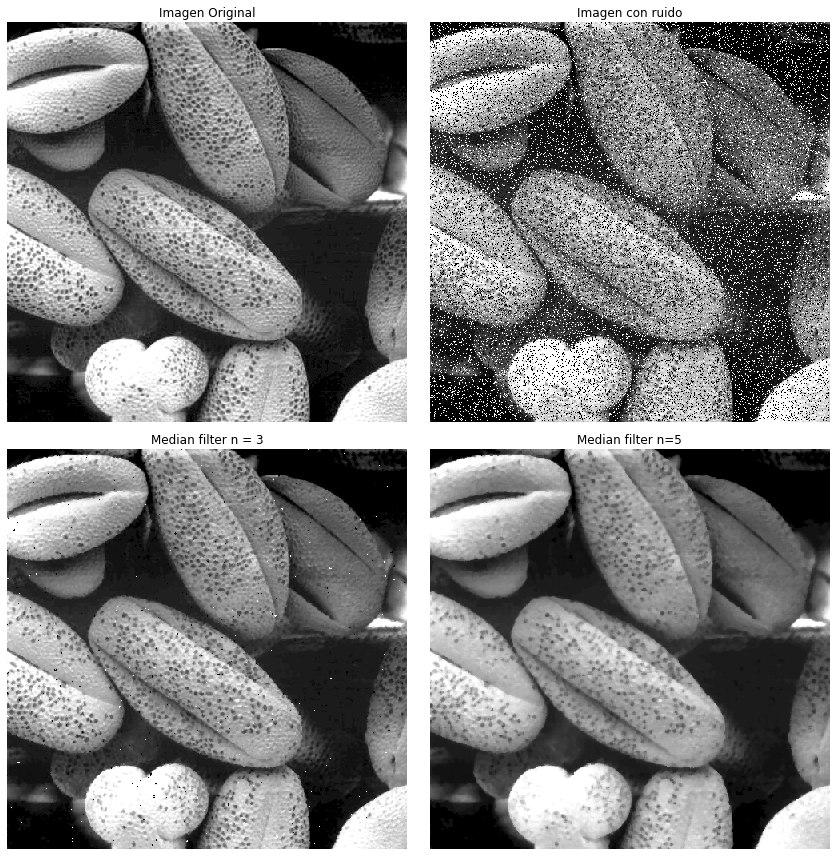

In [12]:
#-------------------------------------------------------------------------------
def salt_peeper_noise(imagen,porcentaje):
    imagen_out = imagen.copy()
    porcentaje = porcentaje/100.0
    npuntos = int(porcentaje/2 * imagen.size) #numero de puntos de sal y pimienta
    salt_points = [np.random.randint(0, i - 1, npuntos) for i in imagen.shape]
    imagen_out[salt_points] = 255 #Salt
    peeper_points = [np.random.randint(0, i - 1, npuntos) for i in imagen.shape]
    imagen_out[peeper_points] = 0 #Pepper
    return imagen_out
#-------------------------------------------------------------------------------
def median_filter(image,n):
    return cv2.medianBlur(image,n)
#-------------------------------------------------------------------------------
def averaging_filter(image,n):
    return cv2.blur(image,(n,n))
#-------------------------------------------------------------------------------
def processImage(name_image):
    original_image = cv2.imread("files/" + name_image, cv2.IMREAD_GRAYSCALE)
    # Display original image
    fig = plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')
    noise_image = salt_peeper_noise(original_image,25)
    # Display noised image 
    plt.subplot(2,2,2)
    plt.imshow(noise_image, cmap='gray')
    plt.title('Imagen con ruido')
    plt.axis('off')
    # Display output filter  
    plt.subplot(2,2,3)
    plt.imshow(median_filter(noise_image,3), cmap='gray')
    plt.title('Median filter n = 3')
    plt.axis('off')
    #Display output filter 
    plt.subplot(2,2,4)
    plt.imshow(median_filter(noise_image,5), cmap='gray')
    plt.title('Median filter n=5')
    plt.axis('off')
    fig.tight_layout() 
#-------------------------------------------------------------------------------
def main5():
    imagenes = ["test_pattern_blurring_orig.png","pollen.jpg"]

    for name in imagenes:
        processImage(name)
        
    plt.show()
#--------------------------------------------------------------------------------------
main5()

### Result: 

The Median filter is an effective technique to reduce salt-peeper noise. The effect of the filter increase in 
proporttion to n. However, Median Filter modifies some features from image, borders from original image are 
attenuated. For example, the output of test_pattern_blurring_orig image has less demarcated borders. This is 
the result of the $\textit{low pass}$ effect of the filter.

In addition Median Filter can eliminate small object from de image. In electronic circuit image, use a high value
of median filter, delete important details from de image, for example, connections and wires. 

## Problem 5 

`1. Write a function that sharpens an image using the Laplacian kernel. Your function should first compute the Laplacian of the input image using the following kernel:
<table>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>-4</td>
<td>1</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
</table>

2. Visualize the Laplacian of the input image. You may consider using a power intensity transformation to enhance the Laplacian image for visualization.

3. Recall that sharpening is achieved by subtraction: $g(x,y) = f(x,y) - \nabla^2 f(x,y) $. Use this method to produce an enhanced image.

4. Recall that subtraction and filtering with a kernel are linear operations. Therefore, it is possible to combine both operations into a single kernel:
<table>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
<tr>
<td>-1</td>
<td> 5</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
</table>
Write another function that directly sharpens the image using this single kernel.

5. Finally, recall that there is an alternative kernel that can be used to compute a Laplacian: 
<table>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td> -8</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>
Write another function that produces a sharpened image using a single enhancement kernel that is based on this alternative definition of the Laplacian.

Apply all the functions you wrote to the image <tt>blurry_moon.png</tt>. Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.

In [16]:
import functools

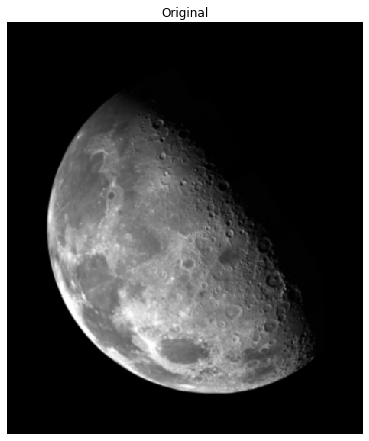

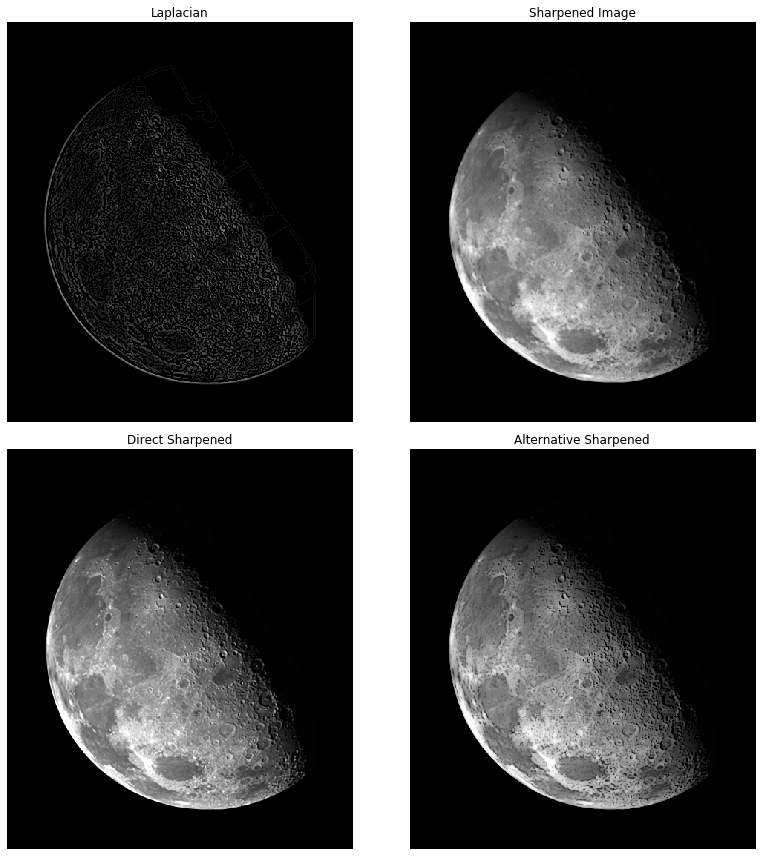

In [18]:
#-------------------------------------------------------------------------------
def T_fxy(imagen, gamma):
    imagen_out = 1 * np.power(imagen/255.0,gamma)
    return (imagen_out*255).astype('int')
#-------------------------------------------------------------------------------
def laplacian(image, kernel):
    output = cv2.filter2D(image, -1,kernel.astype(float))
    return np.abs(output).astype('int')
#-------------------------------------------------------------------------------
def directSharpen5(image):
    return laplacian(image, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))
#-------------------------------------------------------------------------------
def altSharpen8(image):
    out1 = laplacian(image,np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]))
    out = np.subtract(image,out1)
    return out
#------------------------------------------------------------------------------
def processImage5(name):
    # load original image
    img = cv2.imread("files/" + name, cv2.IMREAD_GRAYSCALE)
    plt.bwimshow = functools.partial(plt.imshow, vmin=0, vmax=255)
    # display original image
    plt.figure(figsize = (14, 14))
    plt.subplot(1,2,1)
    plt.bwimshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    # calculate laplacian 
    img_1 = laplacian(img, np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]))
    img_2 = np.subtract(img,img_1)
    # new figure
    fig = plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    # display laplacian 
    # Use a gamma correction to show details 
    plt.bwimshow(T_fxy(img_1,0.5), cmap='gray')
    plt.title('Laplacian') 
    plt.axis('off')
    # Display the subtraction between original image and laplacian 
    plt.subplot(2,2,2)
    plt.bwimshow(img_2, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')
    # Display the subtraction between original image and lapliacian 
    plt.subplot(2,2,3)
    plt.bwimshow(directSharpen5(img), cmap='gray')
    plt.title('Direct Sharpened') 
    plt.axis('off')
    # Display the subtraction between original image and full laplacian image 
    plt.subplot(2,2,4)
    plt.bwimshow(altSharpen8(img), cmap='gray')
    plt.title('Alternative Sharpened') 
    plt.axis('off')
    
    fig.tight_layout()
#-------------------------------------------------------------------------------
def main(): 

    imagenes = ["blurry_moon.png"]

    for name in imagenes:
        processImage5(name)
        
    plt.show()
#-------------------------------------------------------------------------------------
main()

## Result:

Using Laplacian operator it can be observed an enhanced image due to this operator sharpens
attenuated details of original image such as craters. 

Laplacian detects changes of colors between neighbor pixels. If the change of color is high, then value of Laplacian will be too. And substracting the original image and laplacian image, it get a sharpened image with more clear details.

When the following kernel is used:
<table>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td> -8</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>

It can get a more sharpened image than using the Laplacian operator. As you can see in **Alternative Sharpened**.

## Problem 6

The gradient of an image is the two-dimensional vector

$\nabla \mathbf{f} = \left[ \begin{array}{c}G_x\\G_y\end{array} \right] 
=\left[ \begin{array}{c}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y} \end{array} \right]
$

1. Write a function that calculates the image gradients in the $x$ and $y$ directions. Use the following Sobel operators to compute the derivatives:
<table>
<tr>
<td>-1</td>
<td>-2</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>2</td>
<td>1</td>
</tr>
</table>
<table>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>-2</td>
<td>0</td>
<td>2</td>
</tr>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
</table>
The function should output two variables, $G_x$ and $G_y$, which correspond to the derivatives in the $x$ and $y$ directions. Visualize the resulting gradients. Analyze the results obtained. How can you interpret the gradient operators?

2. Write another function that computes the gradient magnitude of an image. Recall that the magnitude of the gradient vector can be computed by:<br>
$\nabla f = \text{mag}(\nabla \mathbf{f}) = \left[ G_x^2 + G_y^2 \right]^\frac{1}{2}$.

3. Write another function that computes an approximation of the gradient magnitude using the following equation: <br>
$\nabla f \approx |G_x| + |G_y|$. <br>
Visualize and compare the resulting gradient magnitudes computed using both methods. How can you interpret the gradient magnitude?

You may use the images <tt>contact_lens_original.png</tt> and <tt>face.png<tt> to test your algorithms.


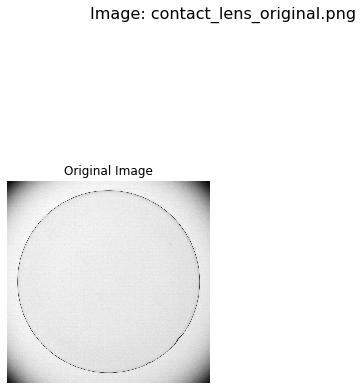

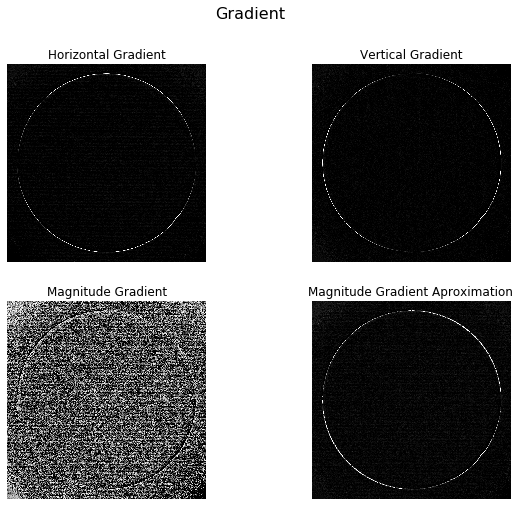

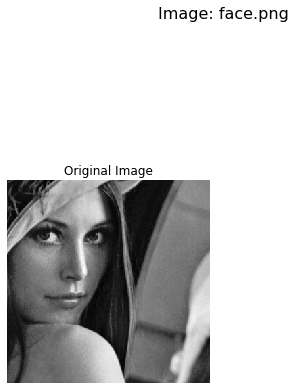

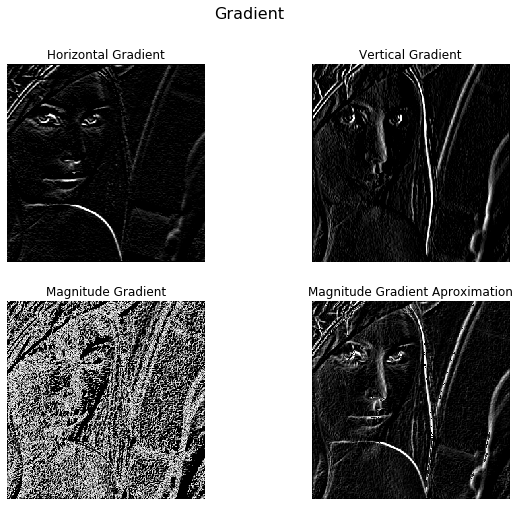

In [23]:
#global variables
sobel_kernel_x = np.array([[-1, -2, -1],[0, 0, 0], [1, 2, 1]])
sobel_kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#------------------------------------------------------------------------------
def gradient(image):
    gradient_x = cv2.filter2D(image,-1,sobel_kernel_x)
    gradient_y = cv2.filter2D(image,-1,sobel_kernel_y)
    return [gradient_x, gradient_y]
#------------------------------------------------------------------------------
def magnitude_gradient(image):
    gradient_x, gradient_y = gradient(image)
    mag_grad =  np.power(np.power(gradient_x,2) + np.power(gradient_y,2),0.5)
    return mag_grad
#------------------------------------------------------------------------------
def aprox_gradient(image):
    gradient_x, gradient_y = gradient(image)
    ap_gradient = np.absolute(gradient_x) + np.absolute(gradient_y)    
    return ap_gradient
#------------------------------------------------------------------------------
def plot_image(img, title):
    plt.imshow(img,cmap = 'gray')
    plt.title(title)
    plt.axis('off')
#------------------------------------------------------------------------------
def processImg(name):
    # COMPUTER 
    # original image      
    img = cv2.imread("files/"+name, cv2.IMREAD_GRAYSCALE)
    # gradient_x and y
    [Gx, Gy] = gradient(img)
    # magnitude_grad
    mag_grad = magnitude_gradient(img)
    # aprox_gradient
    ap_gradient = aprox_gradient(img)

    # display original image 
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plot_image(img, 'Original Image')
    plt.suptitle('Image: ' + name, fontsize=16)
        
    # display gradients
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    plot_image(Gx, 'Horizontal Gradient')
    plt.subplot(2,2,2)
    plot_image(Gy, 'Vertical Gradient')
    # display gradient magnitude 
    plt.subplot(2,2,3)
    plot_image(mag_grad, 'Magnitude Gradient')
    plt.subplot(2,2,4)
    plot_image(ap_gradient, 'Magnitude Gradient Aproximation')
    
    plt.suptitle('Gradient', fontsize=16)
#------------------------------------------------------------------------------
def main6():
    filenames = ['contact_lens_original.png', 'face.png']
    for name in filenames:
        processImg(name)
    plt.show()
#------------------------------------------------------------------------------
main6()

### Result:

Similar to Laplacian, Gradient shows intensity changes. In contrast to average filter, gradient 
operates like $\textit{high pass filter}$, because gradient filter attenuate similiars intensity 
values while bordes and details are increassed. However gradient depend on direction of change, so 
horizontal gradient and vertical gradient generate a diferents output. To view horizonal and vertical
changes at the same time, Vertical and Horizontal Gradient can be added ($G_x + G_y$) or calculate 
gradient magnitude ($mag(\nabla) = \sqrt{ {G_x}^2 + {G_y}^2}$). 

Grandient can be used to detection of defects, for example, gradient filter is able to find 
imperfections on contact_lens_original.png image. In the same way, on the face.png image, gradient 
filter allows to detect skin imperfections and wrinkles. 